In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ruta_fichero_dataSpotify = "/content/drive/MyDrive/Colab Notebooks/spotify_data.csv"

import pandas as pd

dataset_spotify = pd.read_csv(ruta_fichero_dataSpotify)

dataset_spotify


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [ ]:
dataset_spotify = dataset_spotify.drop("Unnamed: 0", axis = 1)

In [ ]:
tipos_de_datos = dataset_spotify.dtypes

tipos_de_datos

artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [ ]:
dataset_spotify.isnull().sum()

artist_name         0
track_name          0
track_id            0
popularity          0
year                0
genre               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.preprocessing import RobustScaler

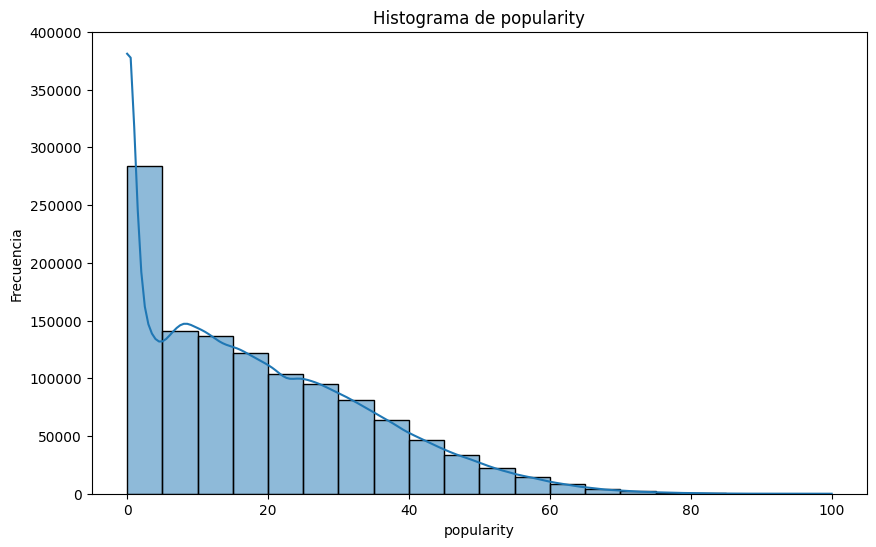

Media de popularidad: 18.38312277325387
Desviación Estándar de popularidad: 15.885544539482252
Mediana de popularidad: 15.0
Cuartiles de popularidad: Q1 = 5.0, Q2 = 15.0, Q3 = 29.0
Rango Interquartílico de popularidad (IQR): 24.0


In [ ]:
# Estudio Descriptivo sobre la variable Popularidad

num_cols = ['popularity']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['popularity'].mean()
print(f"Media de popularidad: {media}")

desviacion_estandar = dataset_spotify['popularity'].std()
print(f"Desviación Estándar de popularidad: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['popularity']).median()
print(f"Mediana de popularidad: {mediana}")

Q1 = dataset_spotify['popularity'].quantile(0.25)
Q2 = dataset_spotify['popularity'].quantile(0.5)
Q3 = dataset_spotify['popularity'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de popularidad: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de popularidad (IQR): {IQR}")

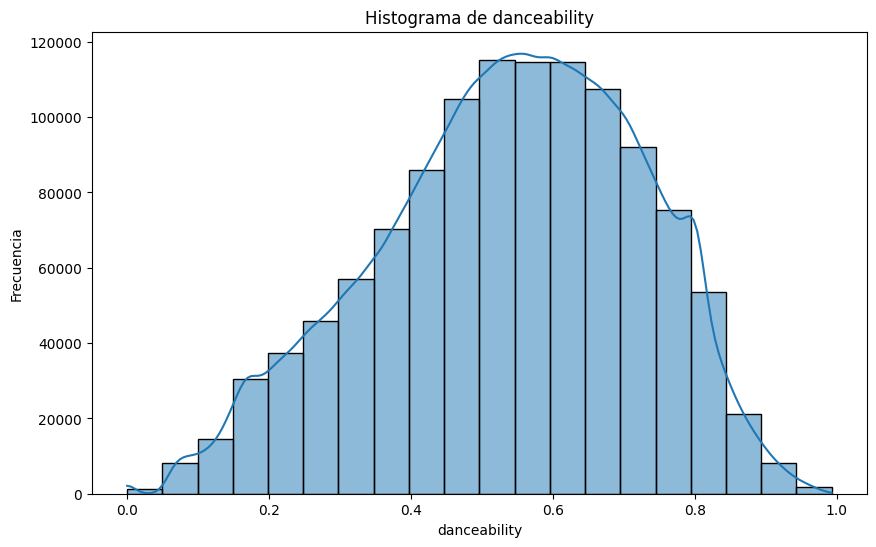

Media de danceability: 0.5374382319161484
Desviación Estándar de danceability: 0.18447803659457462
Mediana de danceability: 0.55
Cuartiles de danceability: Q1 = 0.413, Q2 = 0.55, Q3 = 0.677
Rango Interquartílico de danceability (IQR): 0.26400000000000007


In [ ]:
# Estudio Descriptivo sobre la variable Danceability

num_cols = ['danceability']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['danceability'].mean()
print(f"Media de danceability: {media}")

desviacion_estandar = dataset_spotify['danceability'].std()
print(f"Desviación Estándar de danceability: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['danceability']).median()
print(f"Mediana de danceability: {mediana}")

Q1 = dataset_spotify['danceability'].quantile(0.25)
Q2 = dataset_spotify['danceability'].quantile(0.5)
Q3 = dataset_spotify['danceability'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de danceability: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de danceability (IQR): {IQR}")

<ipython-input-9-c8f6bac9c340>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(danceability, ax=ax1, fit=norm)


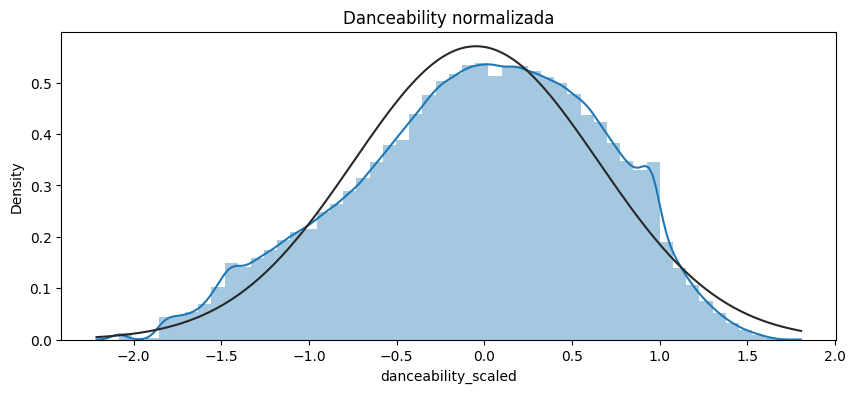

In [ ]:
#Escalado normalizando de la variable Danceability

scaler = RobustScaler()

dataset_spotify['danceability_scaled'] = scaler.fit_transform(dataset_spotify['danceability'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

danceability = dataset_spotify['danceability_scaled']

sns.distplot(danceability, ax=ax1, fit=norm)
ax1.set_title('Danceability normalizada')

plt.show()

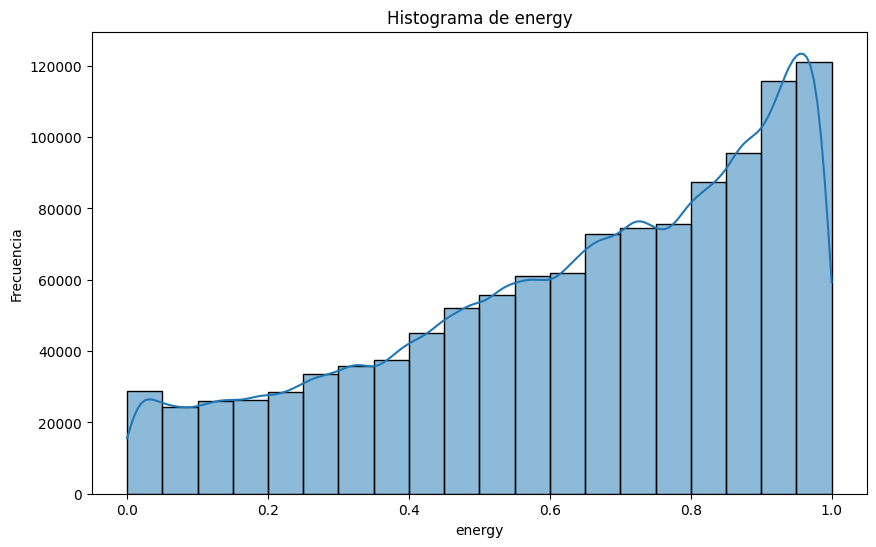

Media de energy: 0.6396698993142569
Desviación Estándar de energy: 0.2705008810656706
Mediana de energy: 0.694
Cuartiles de energy: Q1 = 0.454, Q2 = 0.694, Q3 = 0.873
Rango Interquartílico de energy (IQR): 0.419


In [ ]:
# Estudio Descriptivo sobre la variable Energy

num_cols = ['energy']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['energy'].mean()
print(f"Media de energy: {media}")

desviacion_estandar = dataset_spotify['energy'].std()
print(f"Desviación Estándar de energy: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['energy']).median()
print(f"Mediana de energy: {mediana}")

Q1 = dataset_spotify['energy'].quantile(0.25)
Q2 = dataset_spotify['energy'].quantile(0.5)
Q3 = dataset_spotify['energy'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de energy: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de energy (IQR): {IQR}")

<ipython-input-11-e9aa0124982c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(energy, ax=ax1, fit=norm)


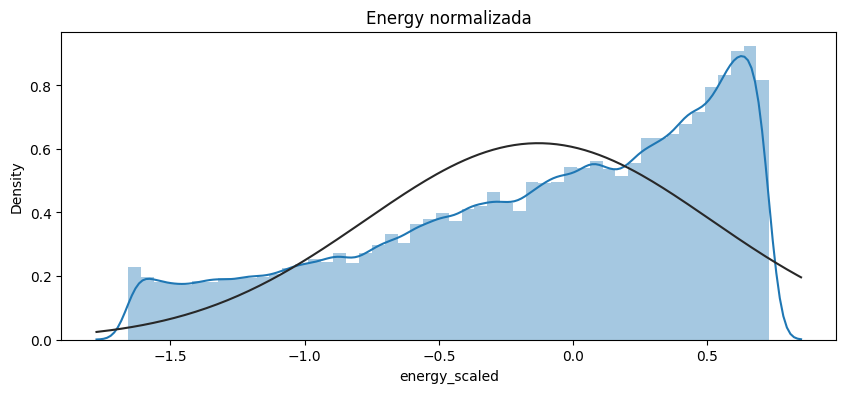

In [ ]:
#Escalado normalizando de la variable Energy

dataset_spotify['energy_scaled'] = scaler.fit_transform(dataset_spotify['energy'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

energy = dataset_spotify['energy_scaled']

sns.distplot(energy, ax=ax1, fit=norm)
ax1.set_title('Energy normalizada')

plt.show()

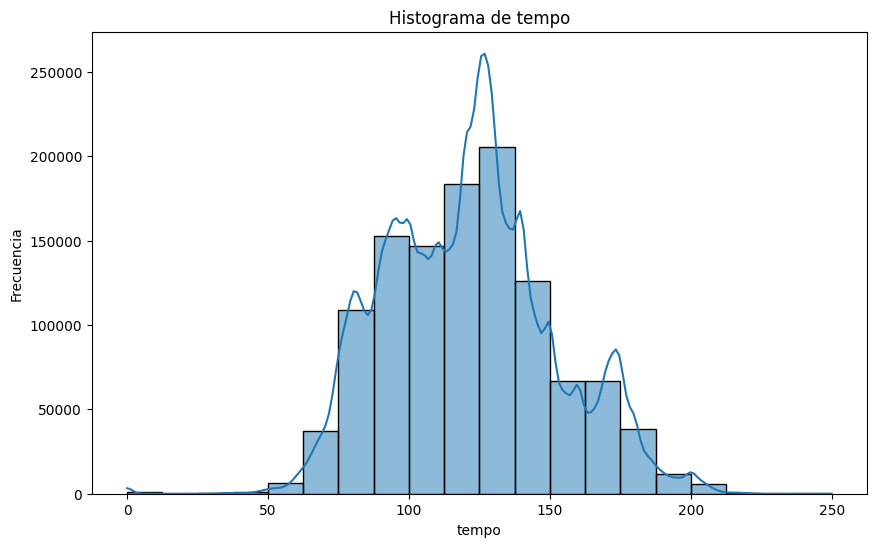

Media de tempo: 121.37713723309231
Desviación Estándar de tempo: 29.779748850107392
Mediana de tempo: 121.931
Cuartiles de tempo: Q1 = 98.797, Q2 = 121.931, Q3 = 139.903
Rango Interquartílico de tempo (IQR): 41.105999999999995


In [ ]:
# Estudio Descriptivo sobre la variable Tempo

num_cols = ['tempo']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['tempo'].mean()
print(f"Media de tempo: {media}")

desviacion_estandar = dataset_spotify['tempo'].std()
print(f"Desviación Estándar de tempo: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['tempo']).median()
print(f"Mediana de tempo: {mediana}")

Q1 = dataset_spotify['tempo'].quantile(0.25)
Q2 = dataset_spotify['tempo'].quantile(0.5)
Q3 = dataset_spotify['tempo'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de tempo: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de tempo (IQR): {IQR}")

<ipython-input-13-d8a3b9d0d273>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tempo, ax=ax1, fit=norm)


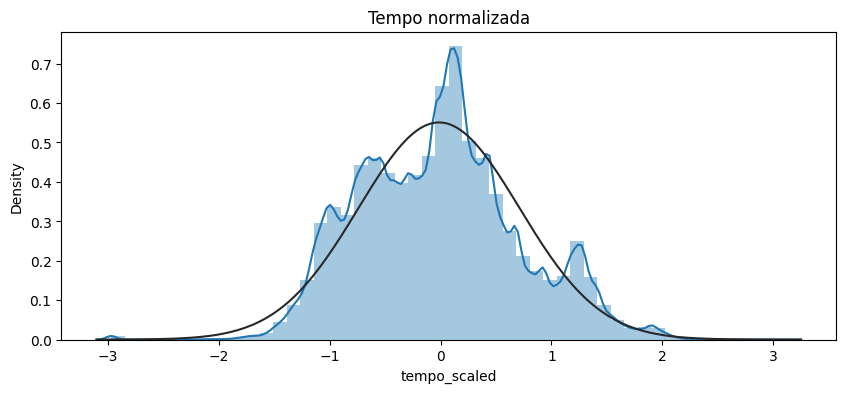

In [ ]:
#Escalado normalizando de la variable Tempo

dataset_spotify['tempo_scaled'] = scaler.fit_transform(dataset_spotify['tempo'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

tempo = dataset_spotify['tempo_scaled']

sns.distplot(tempo, ax=ax1, fit=norm)
ax1.set_title('Tempo normalizada')

plt.show()

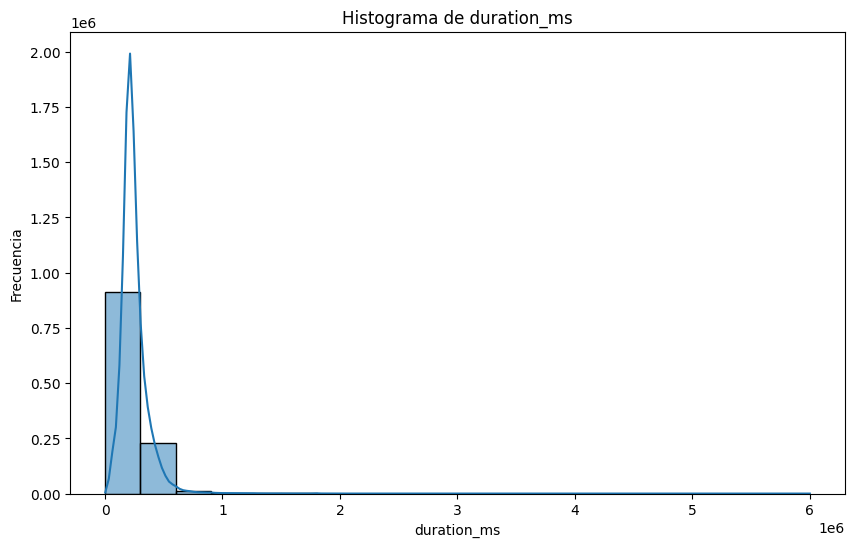

Media de duration_ms: 249561.78122359377
Desviación Estándar de duration_ms: 149426.16452247262
Mediana de duration_ms: 225744.0
Cuartiles de duration_ms: Q1 = 181091.0, Q2 = 225744.0, Q3 = 286913.5
Rango Interquartílico de duration_ms (IQR): 105822.5


In [ ]:
# Estudio Descriptivo sobre la variable Duration_ms

num_cols = ['duration_ms']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['duration_ms'].mean()
print(f"Media de duration_ms: {media}")

desviacion_estandar = dataset_spotify['duration_ms'].std()
print(f"Desviación Estándar de duration_ms: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['duration_ms']).median()
print(f"Mediana de duration_ms: {mediana}")

Q1 = dataset_spotify['duration_ms'].quantile(0.25)
Q2 = dataset_spotify['duration_ms'].quantile(0.5)
Q3 = dataset_spotify['duration_ms'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de duration_ms: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de duration_ms (IQR): {IQR}")

<ipython-input-15-b801d1f3dd52>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(duration_ms, ax=ax1, fit=norm)


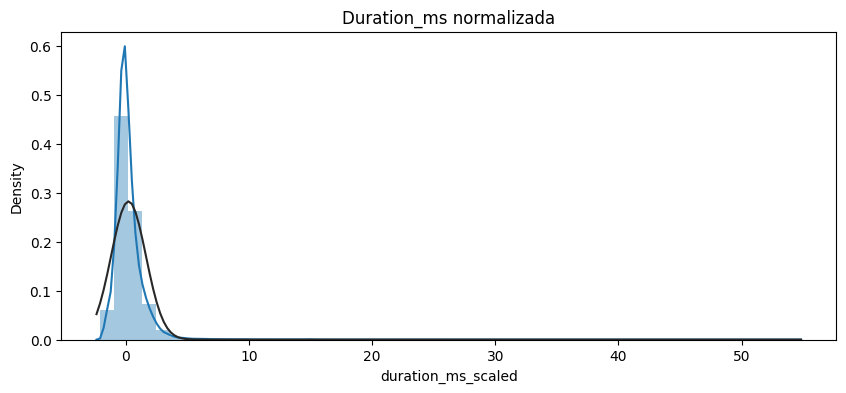

In [ ]:
#Escalado normalizando de la variable Duration_ms

dataset_spotify['duration_ms_scaled'] = scaler.fit_transform(dataset_spotify['duration_ms'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

duration_ms = dataset_spotify['duration_ms_scaled']

sns.distplot(duration_ms, ax=ax1, fit=norm)
ax1.set_title('Duration_ms normalizada')

plt.show()

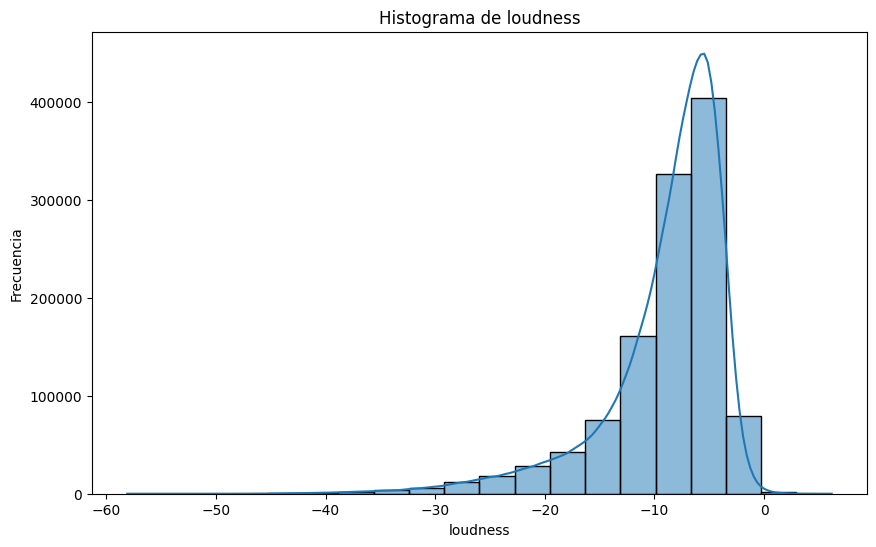

Media de loudness -8.981352824367717
Desviación Estándar de loudness: 5.68221496242959
Mediana de loudness: -7.45
Cuartiles de loudness: Q1 = -10.829, Q2 = -7.45, Q3 = -5.276
Rango Interquartílico de loudness (IQR): 5.553000000000001


In [ ]:
# Estudio Descriptivo sobre la variable Loudness

num_cols = ['loudness']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['loudness'].mean()
print(f"Media de loudness {media}")

desviacion_estandar = dataset_spotify['loudness'].std()
print(f"Desviación Estándar de loudness: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['loudness']).median()
print(f"Mediana de loudness: {mediana}")

Q1 = dataset_spotify['loudness'].quantile(0.25)
Q2 = dataset_spotify['loudness'].quantile(0.5)
Q3 = dataset_spotify['loudness'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de loudness: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de loudness (IQR): {IQR}")

<ipython-input-17-02188b761219>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loudness, ax=ax1, fit=norm)


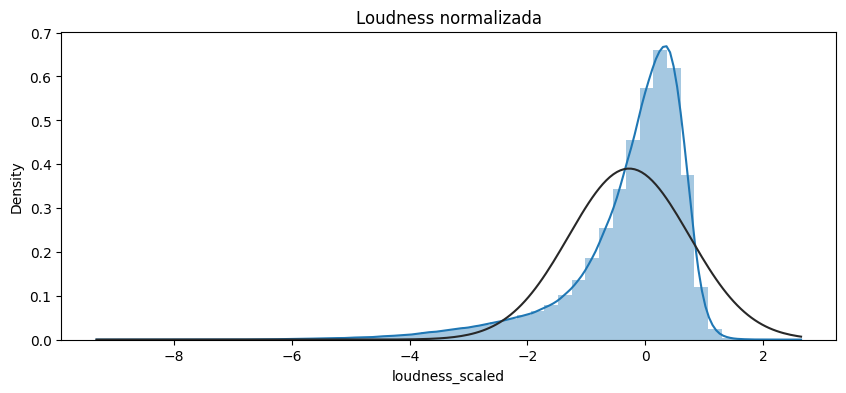

In [ ]:
#Escalado normalizando de la variable Loudness

dataset_spotify['loudness_scaled'] = scaler.fit_transform(dataset_spotify['loudness'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

loudness = dataset_spotify['loudness_scaled']

sns.distplot(loudness, ax=ax1, fit=norm)
ax1.set_title('Loudness normalizada')

plt.show()

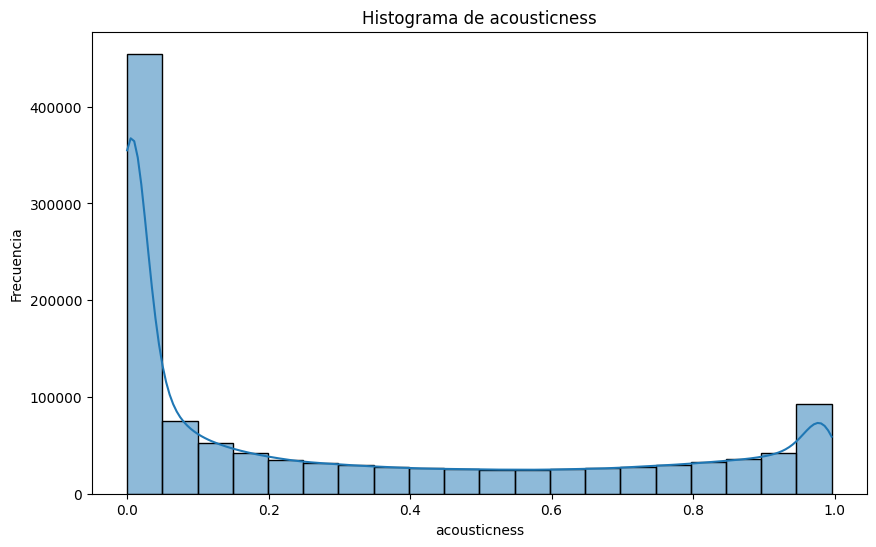

Media de acousticness 0.3215369575202197
Desviación Estándar de acousticness: 0.35498721372892456
Mediana de acousticness: 0.147
Cuartiles de acousticness: Q1 = 0.0064, Q2 = 0.147, Q3 = 0.64
Rango Interquartílico de acousticness (IQR): 0.6336


In [ ]:
# Estudio Descriptivo sobre la variable Acousticness

num_cols = ['acousticness']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['acousticness'].mean()
print(f"Media de acousticness {media}")

desviacion_estandar = dataset_spotify['acousticness'].std()
print(f"Desviación Estándar de acousticness: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['acousticness']).median()
print(f"Mediana de acousticness: {mediana}")

Q1 = dataset_spotify['acousticness'].quantile(0.25)
Q2 = dataset_spotify['acousticness'].quantile(0.5)
Q3 = dataset_spotify['acousticness'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de acousticness: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de acousticness (IQR): {IQR}")

<ipython-input-19-01e2d6ed670f>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acousticness, ax=ax1, fit=norm)


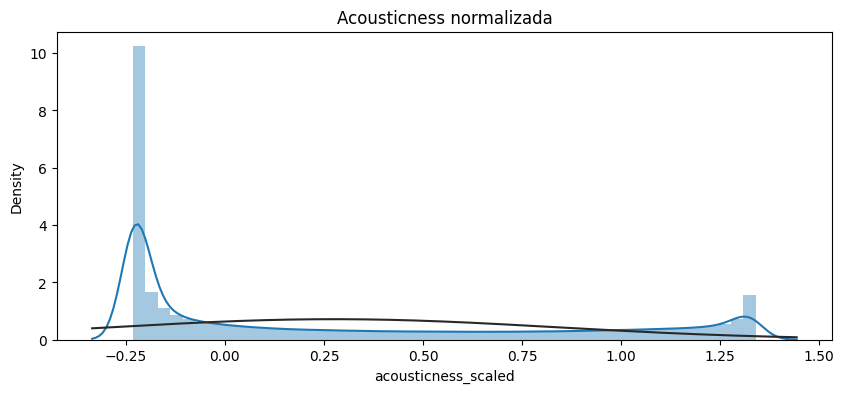

In [ ]:
#Escalado normalizando de la variable Acousticness

dataset_spotify['acousticness_scaled'] = scaler.fit_transform(dataset_spotify['acousticness'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

acousticness = dataset_spotify['acousticness_scaled']

sns.distplot(acousticness, ax=ax1, fit=norm)
ax1.set_title('Acousticness normalizada')

plt.show()

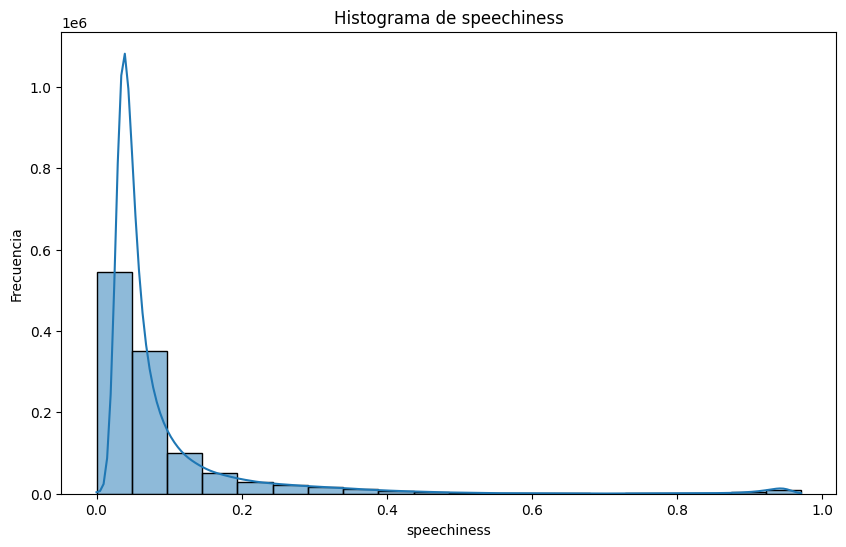

Media de speechiness 0.09281476791830062
Desviación Estándar de speechiness: 0.12684091523415666
Mediana de speechiness: 0.0507
Cuartiles de speechiness: Q1 = 0.0371, Q2 = 0.0507, Q3 = 0.089
Rango Interquartílico de speechiness (IQR): 0.051899999999999995


In [ ]:
# Estudio Descriptivo sobre la variable Speechines

num_cols = ['speechiness']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['speechiness'].mean()
print(f"Media de speechiness {media}")

desviacion_estandar = dataset_spotify['speechiness'].std()
print(f"Desviación Estándar de speechiness: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['speechiness']).median()
print(f"Mediana de speechiness: {mediana}")

Q1 = dataset_spotify['speechiness'].quantile(0.25)
Q2 = dataset_spotify['speechiness'].quantile(0.5)
Q3 = dataset_spotify['speechiness'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de speechiness: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de speechiness (IQR): {IQR}")

<ipython-input-21-bcad58749f77>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(speechiness, ax=ax1, fit=norm)


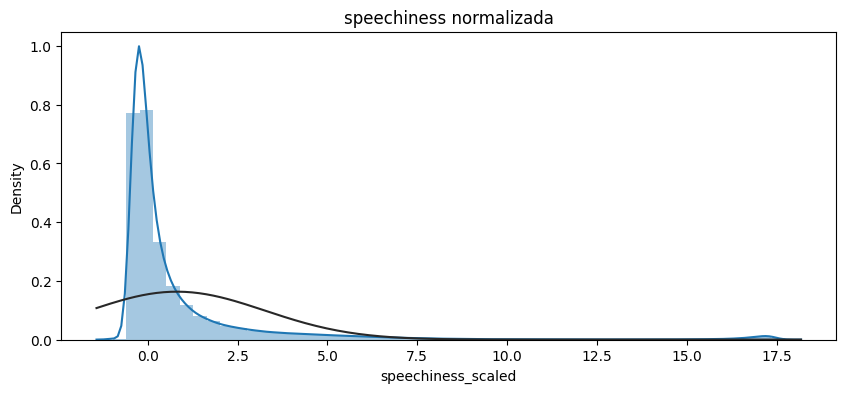

In [ ]:
#Escalado normalizando de la variable Speechiness

dataset_spotify['speechiness_scaled'] = scaler.fit_transform(dataset_spotify['speechiness'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

speechiness = dataset_spotify['speechiness_scaled']

sns.distplot(speechiness, ax=ax1, fit=norm)
ax1.set_title('speechiness normalizada')

plt.show()

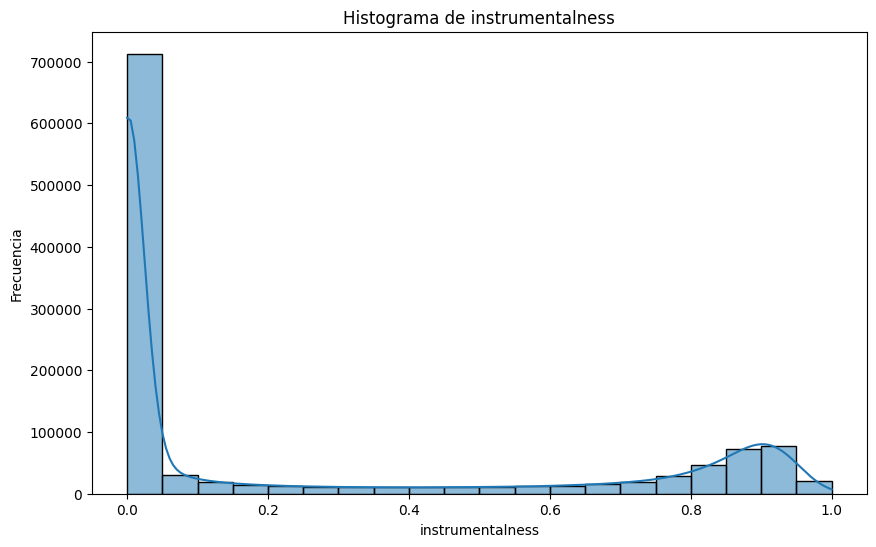

Media de instrumentalness 0.25234888867412686
Desviación Estándar de instrumentalness: 0.3650730853071376
Mediana de instrumentalness: 0.00176
Cuartiles de instrumentalness: Q1 = 1.05e-06, Q2 = 0.00176, Q3 = 0.614
Rango Interquartílico de instrumentalness (IQR): 0.61399895


In [ ]:
# Estudio Descriptivo sobre la variable Instrumentalness

num_cols = ['instrumentalness']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['instrumentalness'].mean()
print(f"Media de instrumentalness {media}")

desviacion_estandar = dataset_spotify['instrumentalness'].std()
print(f"Desviación Estándar de instrumentalness: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['instrumentalness']).median()
print(f"Mediana de instrumentalness: {mediana}")

Q1 = dataset_spotify['instrumentalness'].quantile(0.25)
Q2 = dataset_spotify['instrumentalness'].quantile(0.5)
Q3 = dataset_spotify['instrumentalness'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de instrumentalness: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de instrumentalness (IQR): {IQR}")

<ipython-input-23-2ce345e373a9>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instrumentalness, ax=ax1, fit=norm)


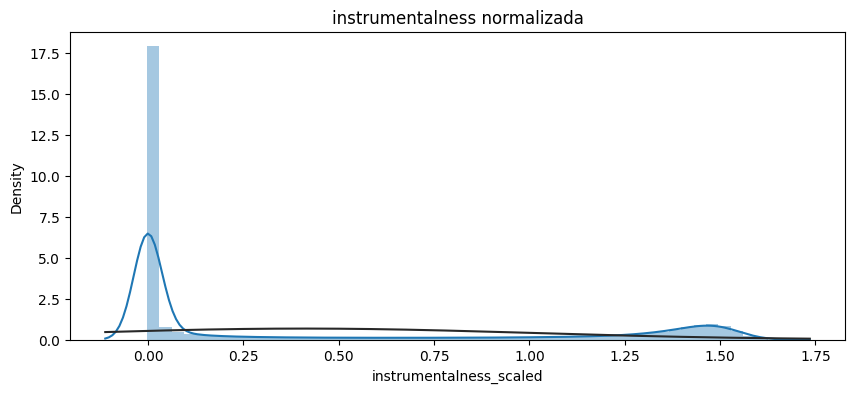

In [ ]:
#Escalado normalizando de la variable Instrumentalness

dataset_spotify['instrumentalness_scaled'] = scaler.fit_transform(dataset_spotify['instrumentalness'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

instrumentalness = dataset_spotify['instrumentalness_scaled']

sns.distplot(instrumentalness, ax=ax1, fit=norm)
ax1.set_title('instrumentalness normalizada')

plt.show()

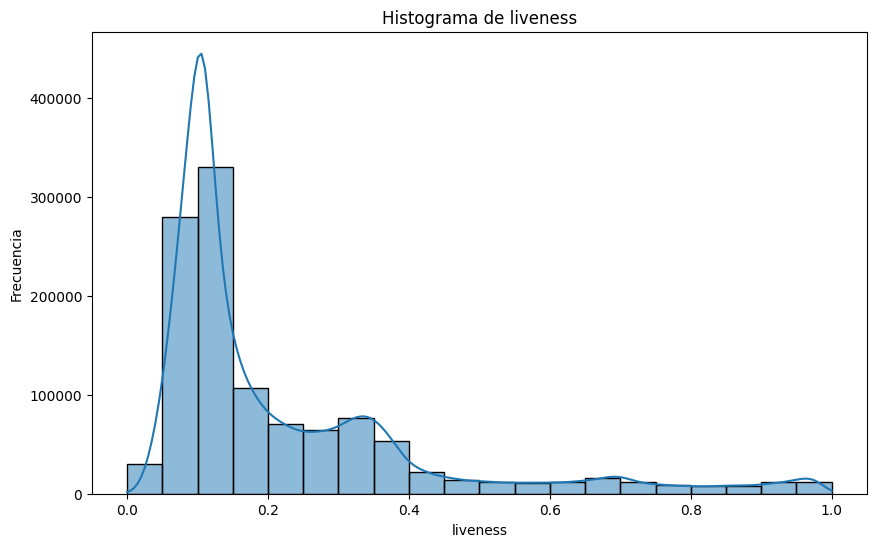

Media de liveness 0.22301887352944214
Desviación Estándar de liveness: 0.20107070354637605
Mediana de liveness: 0.134
Cuartiles de liveness: Q1 = 0.0979, Q2 = 0.134, Q3 = 0.292
Rango Interquartílico de liveness (IQR): 0.1941


In [ ]:
# Estudio Descriptivo sobre la variable Liveness

num_cols = ['liveness']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['liveness'].mean()
print(f"Media de liveness {media}")

desviacion_estandar = dataset_spotify['liveness'].std()
print(f"Desviación Estándar de liveness: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['liveness']).median()
print(f"Mediana de liveness: {mediana}")

Q1 = dataset_spotify['liveness'].quantile(0.25)
Q2 = dataset_spotify['liveness'].quantile(0.5)
Q3 = dataset_spotify['liveness'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de liveness: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de liveness (IQR): {IQR}")

<ipython-input-25-68576ab5a6b2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(liveness, ax=ax1, fit=norm)


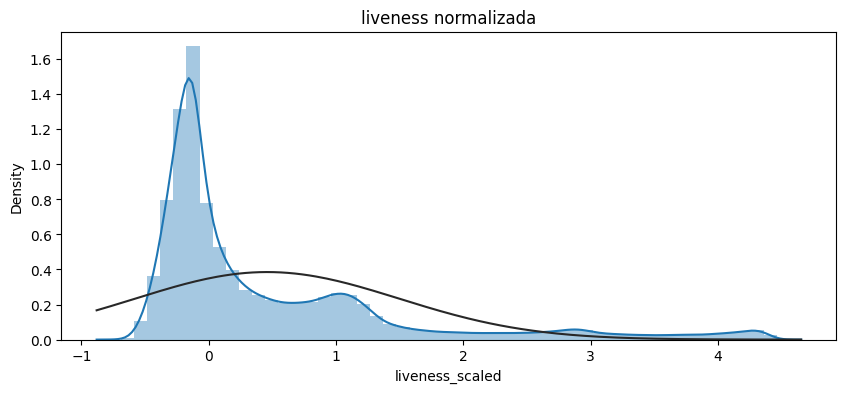

In [ ]:
#Escalado normalizando de la variable Liveness

dataset_spotify['liveness_scaled'] = scaler.fit_transform(dataset_spotify['liveness'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

liveness = dataset_spotify['liveness_scaled']

sns.distplot(liveness, ax=ax1, fit=norm)
ax1.set_title('liveness normalizada')

plt.show()

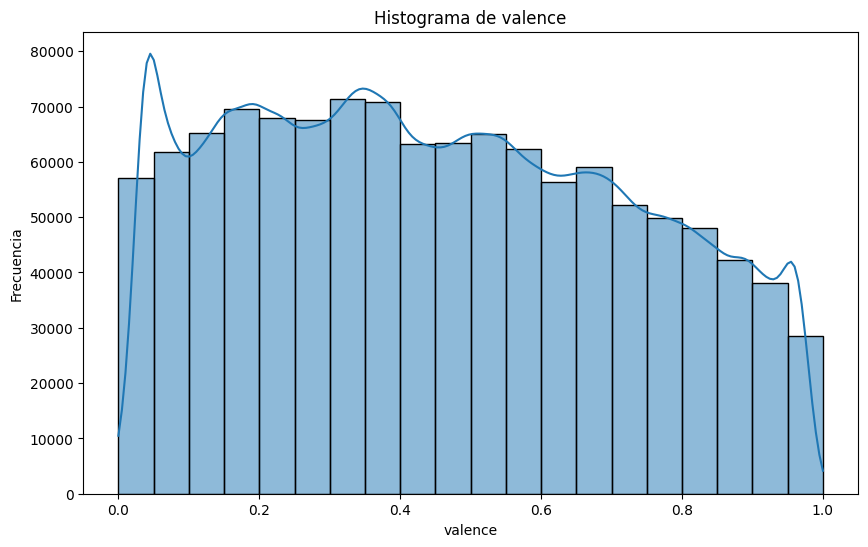

Media de valence 0.45556359603419305
Desviación Estándar de valence: 0.26851898180703054
Mediana de valence: 0.438
Cuartiles de valence: Q1 = 0.226, Q2 = 0.438, Q3 = 0.674
Rango Interquartílico de valence (IQR): 0.44800000000000006


In [ ]:
# Estudio Descriptivo sobre la variable Valence

num_cols = ['valence']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_spotify[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

media = dataset_spotify['valence'].mean()
print(f"Media de valence {media}")

desviacion_estandar = dataset_spotify['valence'].std()
print(f"Desviación Estándar de valence: {desviacion_estandar}")


mediana = pd.Series(dataset_spotify['valence']).median()
print(f"Mediana de valence: {mediana}")

Q1 = dataset_spotify['valence'].quantile(0.25)
Q2 = dataset_spotify['valence'].quantile(0.5)
Q3 = dataset_spotify['valence'].quantile(0.75)
IQR = Q3 - Q1
print(f"Cuartiles de valence: Q1 = {Q1}, Q2 = {Q2}, Q3 = {Q3}")
print(f"Rango Interquartílico de valence (IQR): {IQR}")

<ipython-input-27-de4c071e7635>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valence, ax=ax1, fit=norm)


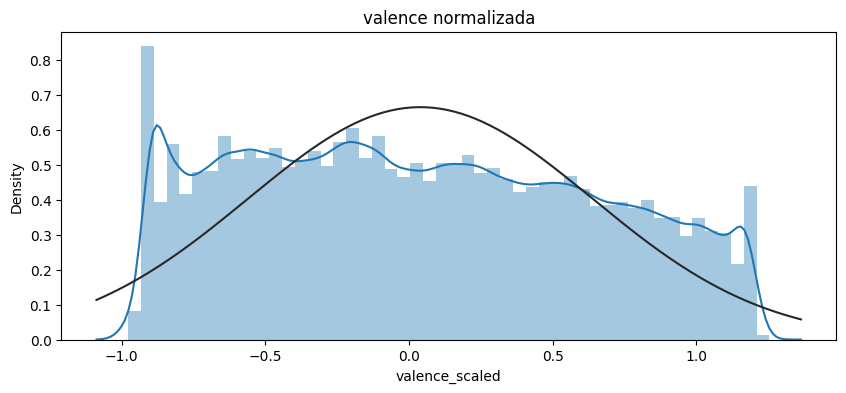

In [ ]:
#Escalado normalizando de la variable Valence

dataset_spotify['valence_scaled'] = scaler.fit_transform(dataset_spotify['valence'].values.reshape(-1,1))

f, (ax1) = plt.subplots(1, 1, figsize=(10,4))

valence = dataset_spotify['valence_scaled']

sns.distplot(valence, ax=ax1, fit=norm)
ax1.set_title('valence normalizada')

plt.show()

<ipython-input-28-7b245a871079>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=key_counts.index, y=key_counts.values, palette="viridis")


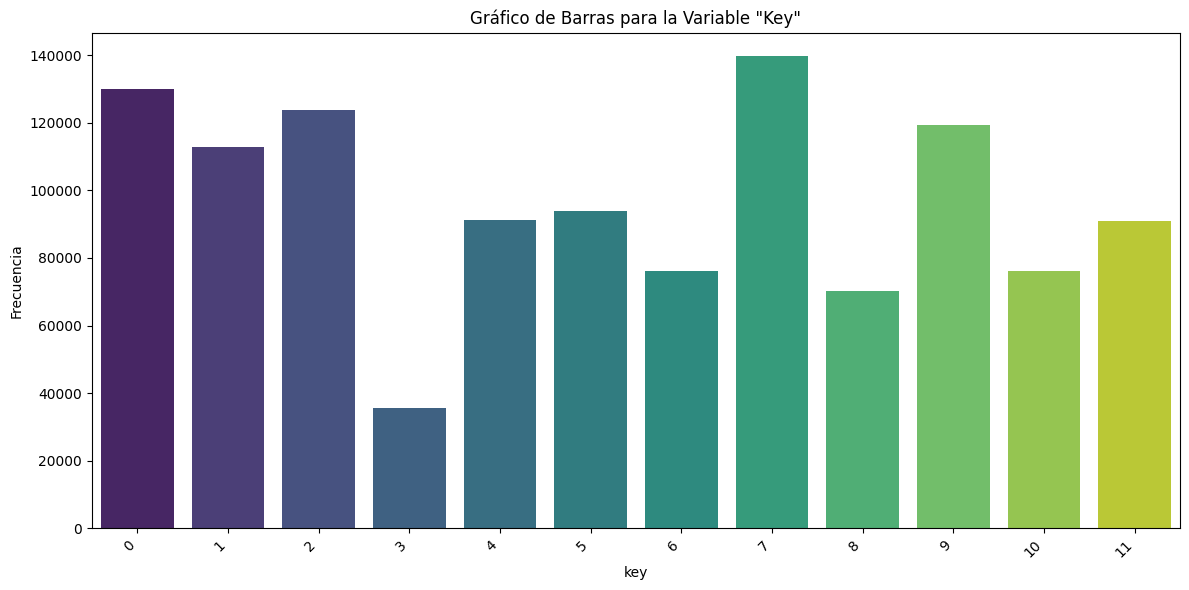

Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:
7     0.120399
0     0.112162
2     0.106651
9     0.102860
1     0.097266
5     0.081079
4     0.078611
11    0.078425
6     0.065634
10    0.065563
8     0.060535
3     0.030815
Name: key, dtype: float64
La moda de Key es la categoria: 7


In [ ]:
# Estudio Descriptivo sobre la variable Key

key_counts = dataset_spotify['key'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=key_counts.index, y=key_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x
plt.xlabel('key')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras para la Variable "Key"')
plt.tight_layout()
plt.show()

frecuencia_relativa = (key_counts / key_counts.sum())

categorias_ordenadas = frecuencia_relativa.sort_values(ascending=False).index

moda = key_counts.idxmax()

print("Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:")
print(frecuencia_relativa[categorias_ordenadas])

print("La moda de Key es la categoria:", moda)

<ipython-input-29-ba0e78107b60>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, palette="viridis")


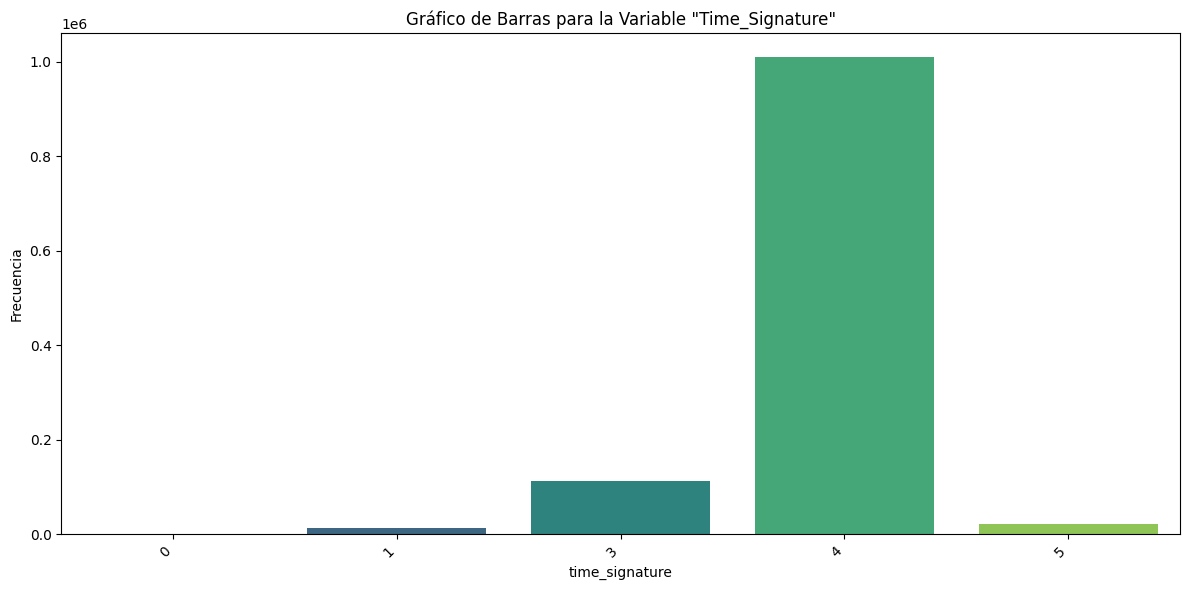

Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:
4    0.871447
3    0.096858
5    0.019720
1    0.010916
0    0.001059
Name: time_signature, dtype: float64
La moda de Time_Signature es la categoria: 4


In [ ]:
# Estudio Descriptivo sobre la variable Time Signature

time_signature_counts = dataset_spotify['time_signature'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x
plt.xlabel('time_signature')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras para la Variable "Time_Signature"')
plt.tight_layout()
plt.show()

frecuencia_relativa = (time_signature_counts / time_signature_counts.sum())

categorias_ordenadas = frecuencia_relativa.sort_values(ascending=False).index

moda = time_signature_counts.idxmax()

print("Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:")
print(frecuencia_relativa[categorias_ordenadas])

print("La moda de Time_Signature es la categoria:", moda)

<ipython-input-30-f7f958c731e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_counts.index, y=mode_counts.values, palette="viridis")


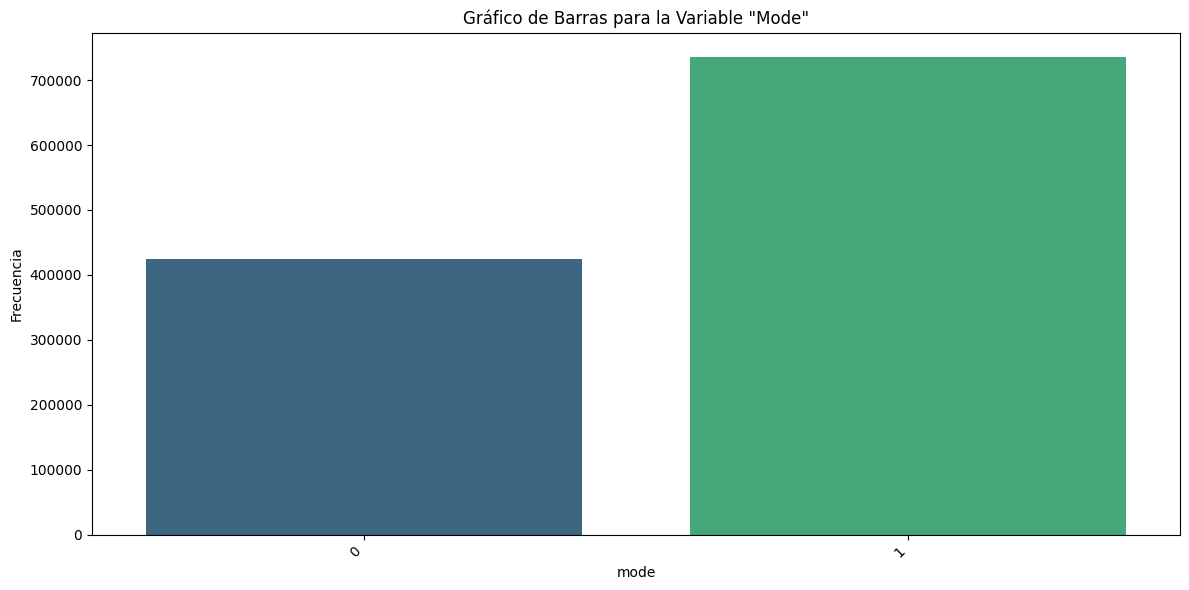

Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:
1    0.634653
0    0.365347
Name: mode, dtype: float64
La moda de Mode es la categoria: 1


In [ ]:
# Estudio Descriptivo sobre la variable Mode

mode_counts = dataset_spotify['mode'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=mode_counts.index, y=mode_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje x
plt.xlabel('mode')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras para la Variable "Mode"')
plt.tight_layout()
plt.show()

frecuencia_relativa = (mode_counts / mode_counts.sum())

categorias_ordenadas = frecuencia_relativa.sort_values(ascending=False).index

moda = mode_counts.idxmax()

print("Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:")
print(frecuencia_relativa[categorias_ordenadas])

print("La moda de Mode es la categoria:", moda)

In [ ]:
# Creamos la codificación de etiquetas.
genre_encoding = {
    'acoustic': 1,
    'afrobeat': 2,
    'alt-rock': 3,
    'ambient': 4,
    'black-metal': 5,
    'blues': 6,
    'breakbeat': 7,
    'cantopop': 8,
    'chicago-house': 9,
    'chill': 10,
    'classical': 11,
    'club': 12,
    'comedy': 13,
    'country': 14,
    'dance': 15,
    'dancehall': 16,
    'death-metal': 17,
    'deep-house': 18,
    'detroit-techno': 19,
    'disco': 20,
    'drum-and-bass': 21,
    'dub': 22,
    'dubstep': 23,
    'edm': 24,
    'electro': 25,
    'electronic': 26,
    'emo': 27,
    'folk': 28,
    'forro': 29,
    'french': 30,
    'funk': 31,
    'garage': 32,
    'german': 33,
    'gospel': 34,
    'goth': 35,
    'grindcore': 36,
    'groove': 37,
    'guitar': 38,
    'hard-rock': 39,
    'hardcore': 40,
    'hardstyle': 41,
    'heavy-metal': 42,
    'hip-hop': 43,
    'house': 44,
    'indian': 45,
    'indie-pop': 46,
    'industrial': 47,
    'jazz': 48,
    'k-pop': 49,
    'metal': 50,
    'metalcore': 51,
    'minimal-techno': 52,
    'new-age': 53,
    'opera': 54,
    'party': 55,
    'piano': 56,
    'pop': 57,
    'pop-film': 58,
    'power-pop': 59,
    'progressive-house': 60,
    'psych-rock': 61,
    'punk': 62,
    'punk-rock': 63,
    'rock': 64,
    'rock-n-roll': 65,
    'romance': 66,
    'sad': 67,
    'salsa': 68,
    'samba': 69,
    'sertanejo': 70,
    'show-tunes': 71,
    'singer-songwriter': 72,
    'ska': 73,
    'sleep': 74,
    'songwriter': 75,
    'soul': 76,
    'spanish': 77,
    'swedish': 78,
    'tango': 79,
    'techno': 80,
    'trance': 81,
    'trip-hop': 82
}

dataset_spotify["genre"] = dataset_spotify["genre"].map(genre_encoding)

dataset_spotify['genre']



0           1
1           1
2           1
3           1
4           1
           ..
1159759    82
1159760    82
1159761    82
1159762    82
1159763    82
Name: genre, Length: 1159764, dtype: int64

<ipython-input-32-3898cf05b58e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=dataset_spotify, order=dataset_spotify['genre'].value_counts().index, palette="viridis")


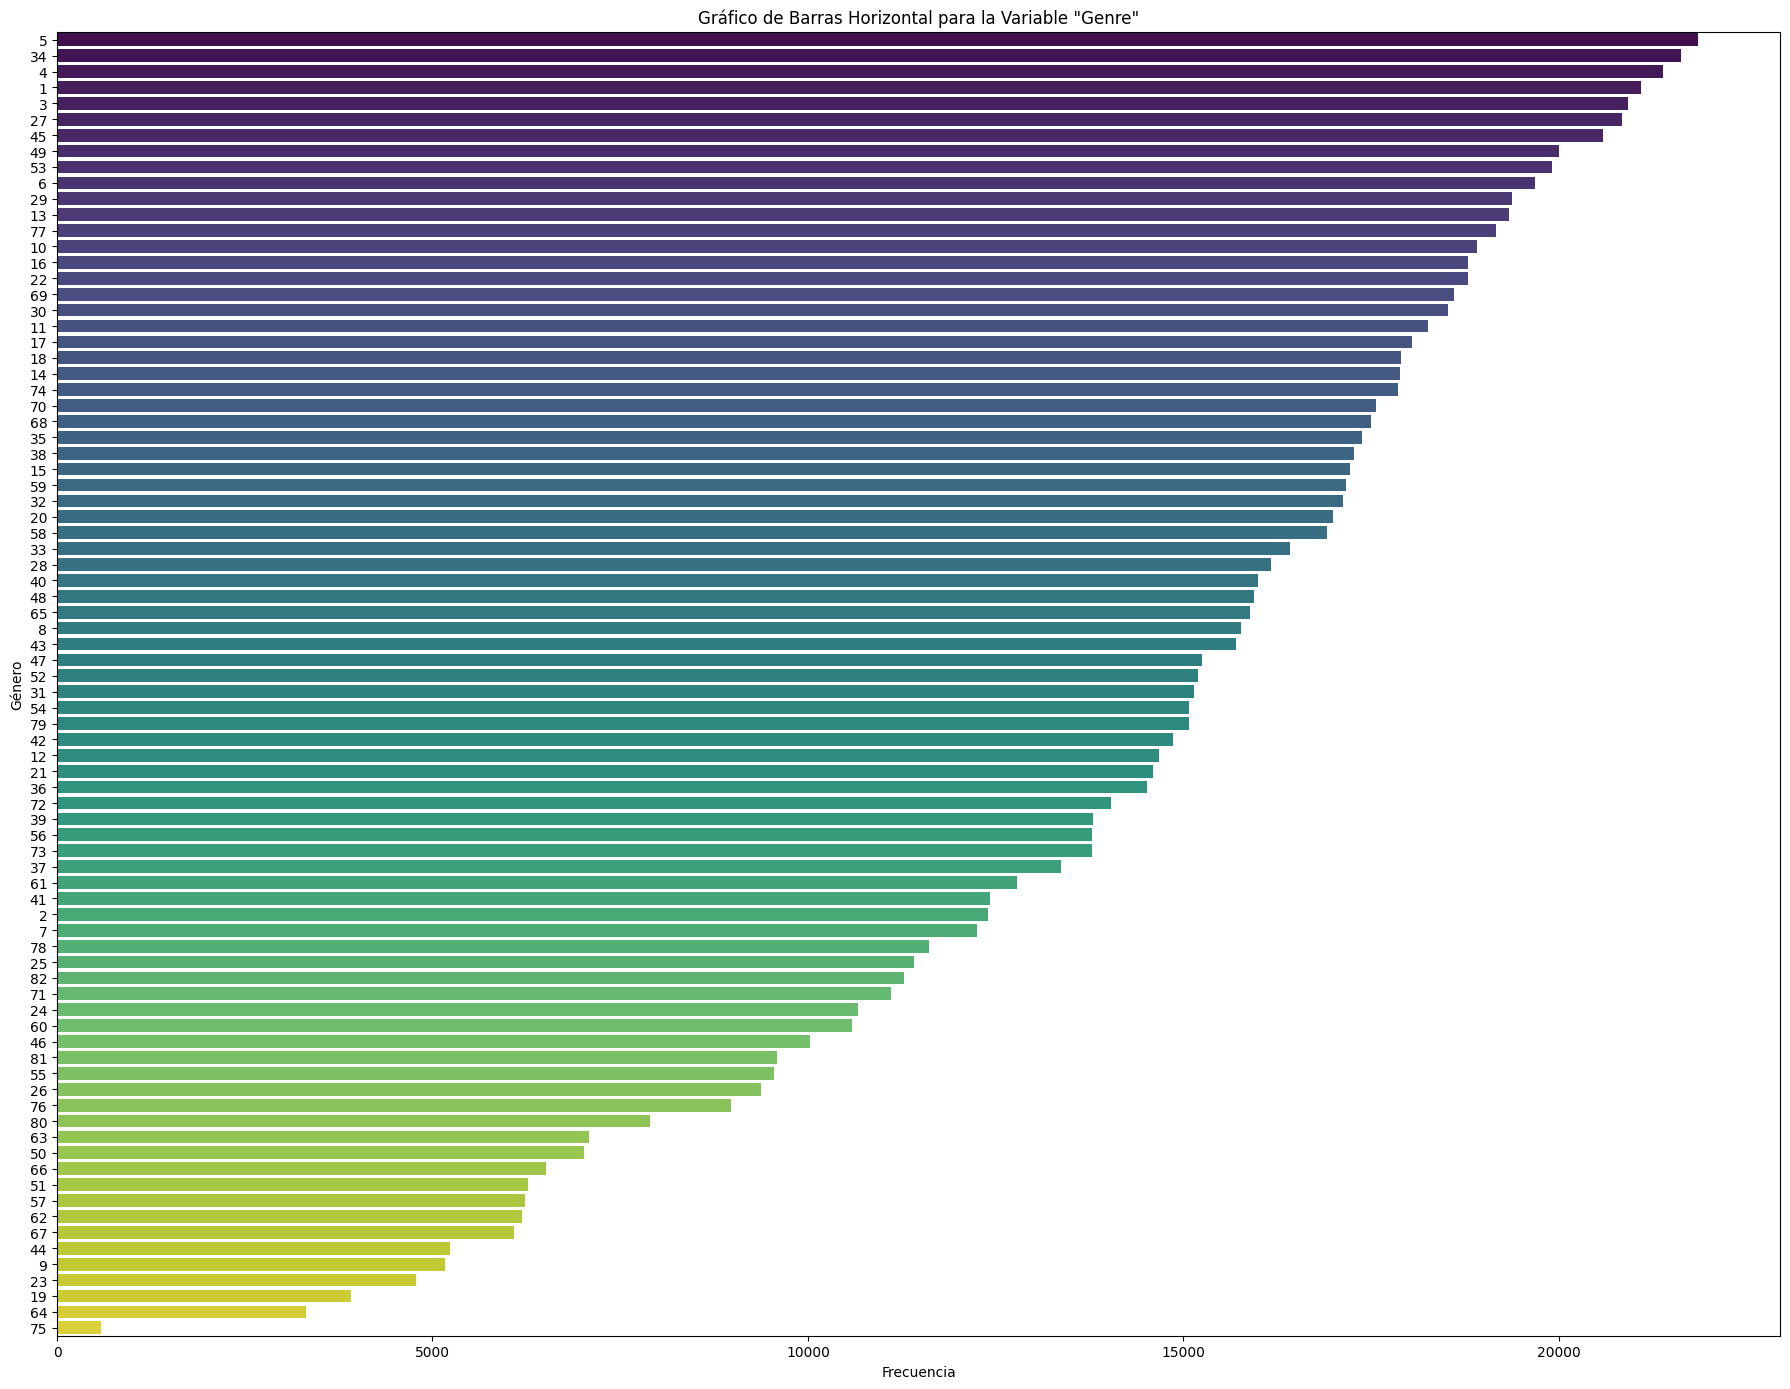

In [ ]:
# Estudio Descriptivo sobre la variable Genre

genre_counts = dataset_spotify['genre'].value_counts()

plt.figure(figsize=(18, 14))
sns.countplot(y='genre', data=dataset_spotify, order=dataset_spotify['genre'].value_counts().index, palette="viridis")
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Gráfico de Barras Horizontal para la Variable "Genre"')
plt.tight_layout()
plt.show()

frecuencia_relativa = (genre_counts / genre_counts.sum())

categorias_ordenadas = frecuencia_relativa.sort_values(ascending=False).index

moda = genre_counts.idxmax()

print("Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:")
print(frecuencia_relativa[categorias_ordenadas])

print("La moda de Genre es la categoria:", moda)

Frecuencia Relativa de cada categoria ordenada de manera descendente según su frecuencia:
5     0.018842
34    0.018643
4     0.018443
1     0.018191
3     0.018036
        ...   
9     0.004458
23    0.004116
19    0.003380
64    0.002862
75    0.000508
Name: genre, Length: 82, dtype: float64
La moda de Genre es la categoria: 5


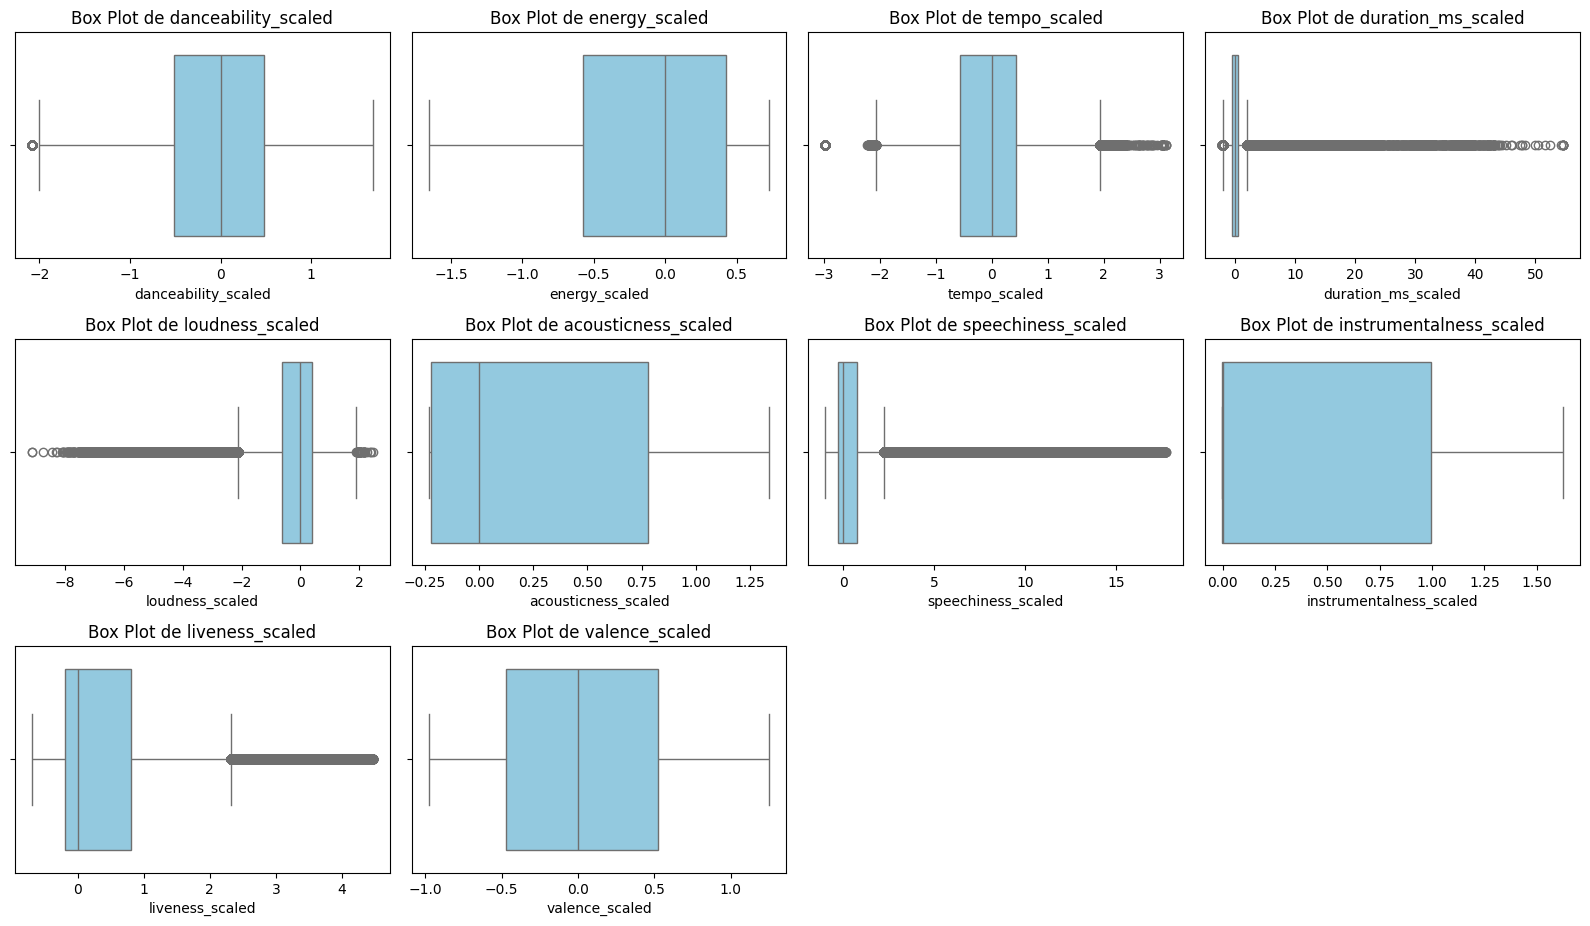

In [ ]:
# Lista de variables para crear box plots. Dejamos las variables normalizadas
variables = ['danceability_scaled', 'energy_scaled', 'tempo_scaled', 'duration_ms_scaled', 'loudness_scaled', 'acousticness_scaled', 'speechiness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled']

# Crear subtramas para los box plots
plt.figure(figsize=(16, 12))
for i, variable in enumerate(variables):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=dataset_spotify[variable], color='skyblue')
    plt.title(f'Box Plot de {variable}')
    plt.xlabel(variable)

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar los box plots
plt.show()

In [ ]:
# Calcular el rango intercuartil (IQR) para cada variable

variables = ['danceability_scaled', 'energy_scaled', 'tempo_scaled', 'duration_ms_scaled', 'loudness_scaled', 'acousticness_scaled', 'speechiness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled']

for variable in variables:
    Q1 = dataset_spotify[variable].quantile(0.25)
    Q3 = dataset_spotify[variable].quantile(0.75)
    IQR = Q3 - Q1

    # Calcular los límites del rango
    min_range = Q1 - 1.5 * IQR
    max_range = Q3 + 1.5 * IQR

    # Identificar outliers superiores e inferiores
    outliers_superiores = dataset_spotify[variable] > max_range
    outliers_inferiores = dataset_spotify[variable] < min_range

    # Imputar los valores de outliers
    dataset_spotify.loc[outliers_superiores, variable] = max_range
    dataset_spotify.loc[outliers_inferiores, variable] = min_range

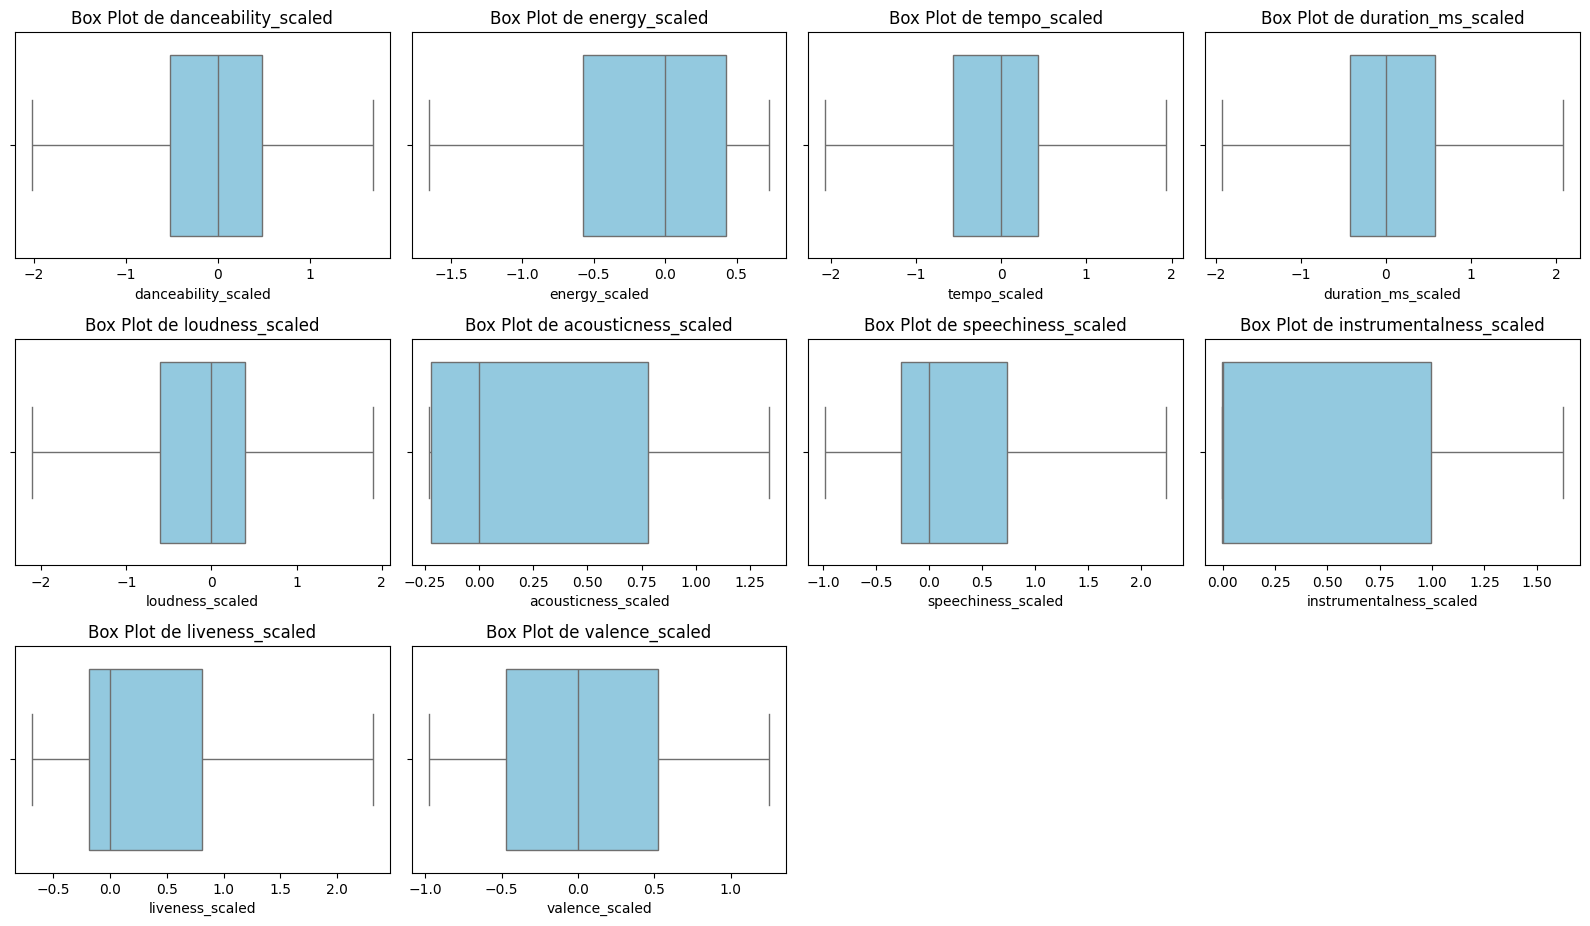

In [ ]:
# Lista de variables para crear box plots
variables = ['danceability_scaled', 'energy_scaled', 'tempo_scaled', 'duration_ms_scaled', 'loudness_scaled', 'acousticness_scaled', 'speechiness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled']

# Crear subtramas para los box plots
plt.figure(figsize=(16, 12))
for i, variable in enumerate(variables):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=dataset_spotify[variable], color='skyblue')
    plt.title(f'Box Plot de {variable}')
    plt.xlabel(variable)

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar los box plots
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, make_scorer
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [ ]:
X = dataset_spotify[['genre', 'danceability_scaled', 'energy_scaled', 'key', 'loudness_scaled', 'mode', 'speechiness_scaled',
          'acousticness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'valence_scaled', 'tempo_scaled',
          'duration_ms_scaled', 'time_signature']]
y = dataset_spotify['popularity']

In [ ]:
#Mejores características SelectionKBest independencia del modelo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

caracteristicas = SelectKBest(score_func= mutual_info_regression , k=5)

X_new = caracteristicas.fit_transform(X, y)

# Obtener índices de las características seleccionadas
caracteristicas_indice = np.where(caracteristicas.get_support())[0]

# Obtener nombres de las características seleccionadas
caracteristicas_nombres = [X.columns[i] for i in caracteristicas_indice]

# Imprimir las características seleccionadas
print("Las 5 mejores características seleccionadas:")
for feature in caracteristicas_nombres:
    print(feature)


KeyboardInterrupt: 

In [ ]:
caracteristicas_seleccionadas = dataset_spotify[['genre', 'acousticness_scaled', 'instrumentalness_scaled', 'tempo_scaled', 'duration_ms_scaled']]

In [ ]:
# Regresión Linear Ridge con conjunto de datos de SelectKBest

X_train, X_test, y_train, y_test = train_test_split(caracteristicas_seleccionadas, dataset_spotify.popularity, test_size=0.2, random_state=123)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver='lsqr', tol=1e-4)

# Ajustar el modelo a los datos de entrenamiento
ridge.fit(X_train, y_train)

# Predecir los valores en los datos de prueba
y_pred = ridge.predict(X_test)

# Calcular el MAE
mae_lr = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_lr = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_lr = mean_squared_error(y_test, y_pred)

#Calcular el R-cuadrado
r2_ridge = r2_score(y_test, y_pred)


# Imprimir los valores
print(f"MAE: {mae_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R-cuadradro: {r2_ridge:.2f}")

MAE: 12.69
MAPE: 165.06
RMSE: 15.48
MSE: 239.55
R-cuadradro: 0.05


In [ ]:
# Validción Cruzada de la Regresión Linear con conjunto de datos SelectKBest


# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    ridge.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = ridge.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_ridge = sum(mae_scores) / len(mae_scores)
average_mape_ridge = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_ridge = (sum((x - average_mae_ridge) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_ridge = (sum((x - average_mape_ridge) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_ridge:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_ridge:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_ridge:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_ridge:.2f}")

Fold 1: MAE = 12.68, MAPE = 164.35
Fold 2: MAE = 12.70, MAPE = 164.38
Fold 3: MAE = 12.71, MAPE = 164.78
Fold 4: MAE = 12.73, MAPE = 165.87
Fold 5: MAE = 12.68, MAPE = 165.63
Fold 6: MAE = 12.68, MAPE = 164.71
Fold 7: MAE = 12.65, MAPE = 164.23
Fold 8: MAE = 12.63, MAPE = 165.19
Fold 9: MAE = 12.68, MAPE = 163.80
Fold 10: MAE = 12.71, MAPE = 165.08
Promedio de MAE en todos los folds: 12.69
Promedio de MAPE en todos los folds: 164.80
Desviación estándar de MAE en todos los folds: 0.03
Desviación estándar de MAPE en todos los folds: 0.65


In [ ]:
#GradientBoost con conjunto de datos SelectKBest

X_train, X_test, y_train, y_test = train_test_split(caracteristicas_seleccionadas, dataset_spotify.popularity, test_size=0.2, random_state=123)

grb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)
grb.fit(X_train, y_train)

y_pred = grb.predict(X_test)

# Calcular el MAE
mae_grb = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_grb = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_grb = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_grb = mean_squared_error(y_test, y_pred)

# Calcular R-cuadrado
r2_grb = r2_score(y_test, y_pred)


# Imprimir los valores
print(f"MAE: {mae_grb:.2f}")
print(f"MAPE: {mape_grb:.2f}")
print(f"RMSE: {rmse_grb:.2f}")
print(f"MSE: {mse_grb:.2f}")
print(f"R-cuadrado: {r2_grb:.2f}")

MAE: 8.83
MAPE: 101.03
RMSE: 11.50
MSE: 132.30
R-cuadrado: 0.48


In [ ]:
# Validción Cruzada de GradientBoost con conjunto de datos de SelectKBest


# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    grb.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = grb.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_grb = sum(mae_scores) / len(mae_scores)
average_mape_grb = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_grb = (sum((x - average_mae_grb) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_grb = (sum((x - average_mape_grb) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_grb:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_grb:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_grb:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_grb:.2f}")

Fold 1: MAE = 8.80, MAPE = 100.19
Fold 2: MAE = 8.85, MAPE = 101.38
Fold 3: MAE = 8.87, MAPE = 100.76
Fold 4: MAE = 8.84, MAPE = 101.98
Fold 5: MAE = 8.82, MAPE = 101.64
Fold 6: MAE = 8.85, MAPE = 101.83
Fold 7: MAE = 8.84, MAPE = 101.25
Fold 8: MAE = 8.79, MAPE = 101.45
Fold 9: MAE = 8.83, MAPE = 100.85
Fold 10: MAE = 8.87, MAPE = 101.38
Promedio de MAE en todos los folds: 8.83
Promedio de MAPE en todos los folds: 101.27
Desviación estándar de MAE en todos los folds: 0.03
Desviación estándar de MAPE en todos los folds: 0.54


In [ ]:
# Randomforestregressor con conjuto de datos de SelectKBest

X_train, X_test, y_train, y_test = train_test_split(caracteristicas_seleccionadas, y, test_size=0.2, random_state=123)

rfr = RandomForestRegressor(max_depth=15, n_estimators=100, random_state = 123)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

# Calcular el MAE
mae_rfr = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_rfr = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_rfr = mean_squared_error(y_test, y_pred)


# Calcular R-cuadrado
r2_rfr = r2_score(y_test, y_pred)

# Imprimir los valores
print(f"MAE: {mae_rfr:.2f}")
print(f"MAPE: {mape_rfr:.2f}")
print(f"RMSE: {rmse_rfr:.2f}")
print(f"MSE: {mse_rfr:.2f}")
print(f"R-cuadrado: {r2_rfr:.2f}")

MAE: 8.86
MAPE: 101.57
RMSE: 11.51
MSE: 132.40
R-cuadrado: 0.48


In [ ]:
# Validación cruzada de RandomForestRegressor con conjunto de datos SelectKBest

# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    rfr.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = rfr.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_rfr = sum(mae_scores) / len(mae_scores)
average_mape_rfr = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_rfr = (sum((x - average_mae_rfr) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_rfr = (sum((x - average_mape_rfr) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_rfr:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_rfr:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_rfr:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_rfr:.2f}")

Fold 1: MAE = 8.82, MAPE = 100.64
Fold 2: MAE = 8.87, MAPE = 101.41
Fold 3: MAE = 8.89, MAPE = 101.20
Fold 4: MAE = 8.86, MAPE = 102.26
Fold 5: MAE = 8.84, MAPE = 102.13
Fold 6: MAE = 8.87, MAPE = 102.03
Fold 7: MAE = 8.86, MAPE = 101.47
Fold 8: MAE = 8.82, MAPE = 101.99
Fold 9: MAE = 8.85, MAPE = 101.33
Fold 10: MAE = 8.88, MAPE = 101.43
Promedio de MAE en todos los folds: 8.86
Promedio de MAPE en todos los folds: 101.59
Desviación estándar de MAE en todos los folds: 0.02
Desviación estándar de MAPE en todos los folds: 0.50


In [ ]:
# XGBoost con conjunto de datos SelectKBest

import xgboost as xgb

xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)

X_train, X_test, y_train, y_test = train_test_split(caracteristicas_seleccionadas, y, test_size=0.2, random_state=42)

xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)


# Calcular el MAE
mae_xgboost = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_xgboost = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_xgboost = mean_squared_error(y_test, y_pred)


# Calcular R-cuadrado
r2_xgboost = r2_score(y_test, y_pred)

# Imprimir los valores
print(f"MAE: {mae_xgboost:.2f}")
print(f"MAPE: {mape_xgboost:.2f}")
print(f"RMSE: {rmse_xgboost:.2f}")
print(f"MSE: {mse_xgboost:.2f}")
print(f"R-cuadrado: {r2_xgboost:.2f}")

MAE: 8.86
MAPE: 101.00
RMSE: 11.54
MSE: 133.08
R-cuadrado: 0.47


In [ ]:
#Validación cruzada de XGBOOST con conjunto de datos SelectKBest

# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    xgboost.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = xgboost.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_xgboost = sum(mae_scores) / len(mae_scores)
average_mape_xgboost = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_xgboost = (sum((x - average_mae_xgboost) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_xgboost = (sum((x - average_mape_xgboost) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_xgboost:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_xgboost:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_xgboost:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_xgboost:.2f}")

Fold 1: MAE = 8.85, MAPE = 101.61
Fold 2: MAE = 8.84, MAPE = 100.32
Fold 3: MAE = 8.85, MAPE = 100.27
Fold 4: MAE = 8.85, MAPE = 102.10
Fold 5: MAE = 8.85, MAPE = 100.25
Fold 6: MAE = 8.85, MAPE = 101.35
Fold 7: MAE = 8.81, MAPE = 100.83
Fold 8: MAE = 8.84, MAPE = 101.19
Fold 9: MAE = 8.83, MAPE = 101.80
Fold 10: MAE = 8.85, MAPE = 100.69
Promedio de MAE en todos los folds: 8.84
Promedio de MAPE en todos los folds: 101.04
Desviación estándar de MAE en todos los folds: 0.01
Desviación estándar de MAPE en todos los folds: 0.67


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(caracteristicas_seleccionadas, y, test_size=0.2, random_state=123)

In [ ]:
#Red neuronal MAE con conjunto de datos SelectKBest

red_neuronal = Sequential ()

red_neuronal.add(Dense(150, input_dim = 5, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(1, activation="linear"))

red_neuronal.compile(loss = 'mean_squared_error', metrics = ['mae'])

resultado = red_neuronal.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)

y_pred = red_neuronal.predict(X_test)

Epoch 1/100
28995/28995 [==============================] - 105s 4ms/step - loss: 219.7167 - mae: 11.9787 - val_loss: 210.8997 - val_mae: 11.6538
Epoch 2/100
28995/28995 [==============================] - 102s 4ms/step - loss: 200.7980 - mae: 11.3234 - val_loss: 204.6873 - val_mae: 11.2558
Epoch 3/100
28995/28995 [==============================] - 102s 4ms/step - loss: 194.4429 - mae: 11.0898 - val_loss: 194.4517 - val_mae: 11.1888
Epoch 4/100
28995/28995 [==============================] - 102s 4ms/step - loss: 192.3810 - mae: 11.0084 - val_loss: 188.7893 - val_mae: 11.0122
Epoch 5/100
28995/28995 [==============================] - 102s 4ms/step - loss: 190.7279 - mae: 10.9422 - val_loss: 188.2988 - val_mae: 10.8969
Epoch 6/100
28995/28995 [==============================] - 110s 4ms/step - loss: 189.5686 - mae: 10.8951 - val_loss: 203.4806 - val_mae: 11.3534
Epoch 7/100
28995/28995 [==============================] - 102s 4ms/step - loss: 188.1648 - mae: 10.8470 - val_loss: 200.5226 - va

In [ ]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
#Red neuronal MAPE con conjunto de datos SelectKBest


red_neuronal = Sequential ()

def custom_loss(y_true, y_pred):
    rmse = K.sqrt(K.mean(K.square(y_pred - y_true)))  # RMSE
    return rmse

# Función personalizada para calcular el MAPE como métrica
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), None)  # Evitar divisiones por cero
    return K.mean(K.abs((y_true - y_pred) / y_true)) * 100

red_neuronal.add(Dense(150, input_dim = 5, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(1, activation="linear"))

red_neuronal.compile(loss=custom_loss, metrics=[mean_absolute_percentage_error])

resultado = red_neuronal.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=75)

y_pred = red_neuronal.predict(X_test)

In [ ]:
#Selección de atrubutos RFE basado en un modelo GradientBoosting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Crear un modelo de Gradient Boosting
model = GradientBoostingRegressor()

# Realizar selección de características utilizando RFE
selector = RFE(model, n_features_to_select=7)  # Seleccionar las 7 mejores características
selector = selector.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]

In [ ]:
selected_features

Index(['genre', 'danceability_scaled', 'loudness_scaled',
       'acousticness_scaled', 'instrumentalness_scaled', 'valence_scaled',
       'duration_ms_scaled'],
      dtype='object')

In [ ]:
selected_features = dataset_spotify[['genre', 'danceability_scaled', 'loudness_scaled', 'instrumentalness_scaled','acousticness_scaled', 'valence_scaled', 'duration_ms_scaled']]

In [ ]:
# Regresión Linear Ridge con conjunto de datos RFE

X_train, X_test, y_train, y_test = train_test_split(selected_features, dataset_spotify.popularity, test_size=0.2, random_state=123)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, solver='lsqr', tol=1e-4)

# Ajustar el modelo a los datos de entrenamiento
ridge.fit(X_train, y_train)

# Predecir los valores en los datos de prueba
y_pred = ridge.predict(X_test)

# Calcular el MAE
mae_lr = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_lr = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_lr = mean_squared_error(y_test, y_pred)

#Calcular el R-cuadrado
r2_ridge = r2_score(y_test, y_pred)


# Imprimir los valores
print(f"MAE: {mae_lr:.2f}")
print(f"MAPE: {mape_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"R-cuadradro: {r2_ridge:.2f}")

MAE: 12.47
MAPE: 161.87
RMSE: 15.24
MSE: 232.18
R-cuadradro: 0.08


In [ ]:
# Validción Cruzada de la Regresión Linear con conjunto de datos RFE


# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    ridge.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = ridge.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_ridge = sum(mae_scores) / len(mae_scores)
average_mape_ridge = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_ridge = (sum((x - average_mae_ridge) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_ridge = (sum((x - average_mape_ridge) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_ridge:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_ridge:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_ridge:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_ridge:.2f}")


Fold 1: MAE = 12.46, MAPE = 161.10
Fold 2: MAE = 12.48, MAPE = 160.91
Fold 3: MAE = 12.50, MAPE = 161.83
Fold 4: MAE = 12.51, MAPE = 162.82
Fold 5: MAE = 12.46, MAPE = 162.27
Fold 6: MAE = 12.46, MAPE = 161.40
Fold 7: MAE = 12.43, MAPE = 160.86
Fold 8: MAE = 12.42, MAPE = 162.07
Fold 9: MAE = 12.45, MAPE = 160.19
Fold 10: MAE = 12.51, MAPE = 162.21
Promedio de MAE en todos los folds: 12.47
Promedio de MAPE en todos los folds: 161.57
Desviación estándar de MAE en todos los folds: 0.03
Desviación estándar de MAPE en todos los folds: 0.81


In [ ]:
#GradientBoost con conjunto de datos RFE

X_train, X_test, y_train, y_test = train_test_split(selected_features, dataset_spotify.popularity, test_size=0.2, random_state=123)

grb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)
grb.fit(X_train, y_train)

y_pred = grb.predict(X_test)

# Calcular el MAE
mae_grb = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_grb = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_grb = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_grb = mean_squared_error(y_test, y_pred)

# Calcular R-cuadrado
r2_grb = r2_score(y_test, y_pred)


# Imprimir los valores
print(f"MAE: {mae_grb:.2f}")
print(f"MAPE: {mape_grb:.2f}")
print(f"RMSE: {rmse_grb:.2f}")
print(f"MSE: {mse_grb:.2f}")
print(f"R-cuadrado: {r2_grb:.2f}")

MAE: 8.60
MAPE: 98.32
RMSE: 11.23
MSE: 126.21
R-cuadrado: 0.50


In [ ]:
# Validción Cruzada de GradientBoost con conjunto de datos RFE


# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    grb.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = grb.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_grb = sum(mae_scores) / len(mae_scores)
average_mape_grb = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_grb = (sum((x - average_mae_grb) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_grb = (sum((x - average_mape_grb) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_grb:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_grb:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_grb:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_grb:.2f}")

Fold 1: MAE = 8.58, MAPE = 97.26
Fold 2: MAE = 8.64, MAPE = 98.39
Fold 3: MAE = 8.64, MAPE = 97.85
Fold 4: MAE = 8.62, MAPE = 99.16
Fold 5: MAE = 8.61, MAPE = 98.89
Fold 6: MAE = 8.61, MAPE = 98.26
Fold 7: MAE = 8.63, MAPE = 98.15
Fold 8: MAE = 8.58, MAPE = 98.48
Fold 9: MAE = 8.59, MAPE = 97.48
Fold 10: MAE = 8.65, MAPE = 98.43
Promedio de MAE en todos los folds: 8.61
Promedio de MAPE en todos los folds: 98.23
Desviación estándar de MAE en todos los folds: 0.02
Desviación estándar de MAPE en todos los folds: 0.59


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import mean_absolute_error


In [ ]:
# Randomforestregressor con conjunto de datos RFE

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=123)

rfr = RandomForestRegressor(max_depth=15, n_estimators=100)

rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

# Calcular el MAE
mae_rfr = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_rfr = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_rfr = mean_squared_error(y_test, y_pred)


# Calcular R-cuadrado
r2_rfr = r2_score(y_test, y_pred)

# Imprimir los valores
print(f"MAE: {mae_rfr:.2f}")
print(f"MAPE: {mape_rfr:.2f}")
print(f"RMSE: {rmse_rfr:.2f}")
print(f"MSE: {mse_rfr:.2f}")
print(f"R-cuadrado: {r2_rfr:.2f}")

MAE: 8.68
MAPE: 99.73
RMSE: 11.28
MSE: 127.35
R-cuadrado: 0.50


In [ ]:
# Validación cruzada de RandomForestRegressor con conjunto de datos RFE

# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    rfr.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = rfr.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_rfr = sum(mae_scores) / len(mae_scores)
average_mape_rfr = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_rfr = (sum((x - average_mae_rfr) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_rfr = (sum((x - average_mape_rfr) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_rfr:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_rfr:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_rfr:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_rfr:.2f}")

Fold 1: MAE = 8.66, MAPE = 98.86
Fold 2: MAE = 8.71, MAPE = 99.87
Fold 3: MAE = 8.72, MAPE = 99.30
Fold 4: MAE = 8.69, MAPE = 100.88
Fold 5: MAE = 8.69, MAPE = 100.35
Fold 6: MAE = 8.68, MAPE = 99.34
Fold 7: MAE = 8.69, MAPE = 99.38
Fold 8: MAE = 8.66, MAPE = 99.82
Fold 9: MAE = 8.67, MAPE = 98.98
Fold 10: MAE = 8.73, MAPE = 100.10
Promedio de MAE en todos los folds: 8.69
Promedio de MAPE en todos los folds: 99.69
Desviación estándar de MAE en todos los folds: 0.02
Desviación estándar de MAPE en todos los folds: 0.64


In [ ]:
# XGBoost con conjunto de datos RFE

import xgboost as xgb

xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

xgboost = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=15,
    random_state=123
)

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)


# Calcular el MAE
mae_xgboost = mean_absolute_error(y_test, y_pred)

# Calcular el MAPE
mask = y_test != 0
y_test_filtrado = y_test[mask]
y_pred_filtrado = y_pred[mask]
mape_xgboost = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

# Calcular el RMSE
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular MSE
mse_xgboost = mean_squared_error(y_test, y_pred)


# Calcular R-cuadrado
r2_xgboost = r2_score(y_test, y_pred)

# Imprimir los valores
print(f"MAE: {mae_xgboost:.2f}")
print(f"MAPE: {mape_xgboost:.2f}")
print(f"RMSE: {rmse_xgboost:.2f}")
print(f"MSE: {mse_xgboost:.2f}")
print(f"R-cuadrado: {r2_xgboost:.2f}")

MAE: 8.60
MAPE: 97.83
RMSE: 11.25
MSE: 126.58
R-cuadrado: 0.50


In [ ]:
#Validación cruzada de XGBOOST con conjunto de datos RFE

# Crear KFold con 10 splits
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar los resultados de MAE y MAPE en cada fold
mae_scores = []
mape_scores = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Ajustar el modelo a los datos de entrenamiento
    xgboost.fit(X_train_fold, y_train_fold)

    # Predecir los valores en los datos de validación
    y_pred_fold = xgboost.predict(X_val_fold)

    # Calcular MAE
    mae = mean_absolute_error(y_val_fold, y_pred_fold)
    mae_scores.append(mae)

    # Filtrar valores cercanos a cero antes de calcular el MAPE
    y_val_fold_filtered = y_val_fold[y_val_fold > 0.001]
    y_pred_fold_filtered = y_pred_fold[y_val_fold > 0.001]


    # Calcular MAPE manualmente
    if len(y_val_fold_filtered) > 0:
        mape = (abs((y_val_fold_filtered - y_pred_fold_filtered) / y_val_fold_filtered)).mean() * 100
        mape_scores.append(mape)
    else:
        mape_scores.append(np.nan)  # Si no hay valores después del filtrado, asignar NaN

# Imprimir los valores de MAE y MAPE en cada fold
for i, (mae, mape) in enumerate(zip(mae_scores, mape_scores)):
    print(f"Fold {i+1}: MAE = {mae:.2f}, MAPE = {mape:.2f}")

# Calcular el promedio de MAE y MAPE
average_mae_xgboost = sum(mae_scores) / len(mae_scores)
average_mape_xgboost = sum(mape_scores) / len(mape_scores)

# Calcular la desviación estándar de MAE y MAPE
std_mae_xgboost = (sum((x - average_mae_xgboost) ** 2 for x in mae_scores) / (len(mae_scores) - 1)) ** 0.5
std_mape_xgboost = (sum((x - average_mape_xgboost) ** 2 for x in mape_scores) / (len(mape_scores) - 1)) ** 0.5

print(f"Promedio de MAE en todos los folds: {average_mae_rfr:.2f}")
print(f"Promedio de MAPE en todos los folds: {average_mape_rfr:.2f}")
print(f"Desviación estándar de MAE en todos los folds: {std_mae_rfr:.2f}")
print(f"Desviación estándar de MAPE en todos los folds: {std_mape_rfr:.2f}")

Fold 1: MAE = 8.56, MAPE = 96.91
Fold 2: MAE = 8.63, MAPE = 98.07
Fold 3: MAE = 8.63, MAPE = 97.42
Fold 4: MAE = 8.59, MAPE = 98.72
Fold 5: MAE = 8.60, MAPE = 98.84
Fold 6: MAE = 8.59, MAPE = 97.55
Fold 7: MAE = 8.61, MAPE = 97.76
Fold 8: MAE = 8.58, MAPE = 98.05
Fold 9: MAE = 8.58, MAPE = 97.19
Fold 10: MAE = 8.64, MAPE = 98.30
Promedio de MAE en todos los folds: 8.69
Promedio de MAPE en todos los folds: 99.69
Desviación estándar de MAE en todos los folds: 0.02
Desviación estándar de MAPE en todos los folds: 0.64


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
from keras.utils import to_categorical
from keras import backend as K

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=123)

In [ ]:
red_neuronal = Sequential ()

red_neuronal.add(Dense(150, input_dim = 5, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(1, activation="linear"))

red_neuronal.compile(loss = 'mean_squared_error', metrics = ['mae'])

resultado = red_neuronal.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=50)

y_pred = red_neuronal.predict(X_test)

Epoch 1/50
28995/28995 [==============================] - 85s 3ms/step - loss: 216.3393 - mae: 11.8591 - val_loss: 202.9554 - val_mae: 11.4184
Epoch 2/50
28995/28995 [==============================] - 101s 3ms/step - loss: 196.0773 - mae: 11.1487 - val_loss: 193.1207 - val_mae: 11.0164
Epoch 3/50
28995/28995 [==============================] - 78s 3ms/step - loss: 190.8008 - mae: 10.9526 - val_loss: 199.1318 - val_mae: 11.2164
Epoch 4/50
28995/28995 [==============================] - 72s 2ms/step - loss: 188.9987 - mae: 10.8867 - val_loss: 186.1504 - val_mae: 10.8267
Epoch 5/50
28995/28995 [==============================] - 73s 3ms/step - loss: 187.7210 - mae: 10.8344 - val_loss: 186.2294 - val_mae: 10.9437
Epoch 6/50
28995/28995 [==============================] - 73s 3ms/step - loss: 187.0134 - mae: 10.8057 - val_loss: 185.4322 - val_mae: 10.7332
Epoch 7/50
28995/28995 [==============================] - 71s 2ms/step - loss: 186.4520 - mae: 10.7888 - val_loss: 192.1530 - val_mae: 11.023

In [ ]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
red_neuronal = Sequential ()

def custom_loss(y_true, y_pred):
    rmse = K.sqrt(K.mean(K.square(y_pred - y_true)))  # RMSE
    return rmse

# Función personalizada para calcular el MAPE como métrica
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = K.clip(y_true, K.epsilon(), None)  # Evitar divisiones por cero
    return K.mean(K.abs((y_true - y_pred) / y_true)) * 100

red_neuronal.add(Dense(150, input_dim = 5, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(150, activation="tanh"))

red_neuronal.add(Dense(1, activation="linear"))

red_neuronal.compile(loss=custom_loss, metrics=[mean_absolute_percentage_error])

resultado = red_neuronal.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=75)

y_pred = red_neuronal.predict(X_test)

Epoch 1/75
28995/28995 [==============================] - 74s 3ms/step - loss: 14.5421 - mean_absolute_percentage_error: 2060681600.0000 - val_loss: 13.9485 - val_mean_absolute_percentage_error: 1974554496.0000
Epoch 2/75
28995/28995 [==============================] - 72s 2ms/step - loss: 13.8173 - mean_absolute_percentage_error: 1862378496.0000 - val_loss: 13.7113 - val_mean_absolute_percentage_error: 1897811712.0000
Epoch 3/75
28995/28995 [==============================] - 73s 3ms/step - loss: 13.6793 - mean_absolute_percentage_error: 1824105216.0000 - val_loss: 13.7081 - val_mean_absolute_percentage_error: 1696980864.0000
Epoch 4/75
28995/28995 [==============================] - 72s 2ms/step - loss: 13.6043 - mean_absolute_percentage_error: 1801398400.0000 - val_loss: 13.6376 - val_mean_absolute_percentage_error: 1902084864.0000
Epoch 5/75
28995/28995 [==============================] - 72s 2ms/step - loss: 13.5541 - mean_absolute_percentage_error: 1788261888.0000 - val_loss: 13.6866